In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.03s
Initializing parameters
Initializing data
Initializing jupyter
Initializing logging
Initializing slack
Initialization complete


In [2]:
sim_gui(mini=True)

# Setup auto-tune

This sets up the autotune sequence, which can be called by `retune_parameter()`.
This parameter finds the optimal tuning position.

In [3]:
# Calibration parameter
from silq.tests.test_parameters import GaussianParameter, Gaussian2DParameter
from silq.measurements.measurement_modules import MeasurementSequence, ConditionSet
from silq.measurements.measurement_types import Loop0DMeasurement, Loop1DMeasurement, Loop2DMeasurement
from silq.parameters.measurement_parameters import MeasurementSequenceParameter

set_parameters = [TGAC, DF]
measurements = [
    Loop0DMeasurement('measure_contrast', 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast'),
    Loop2DMeasurement('fine_loop_contrast', step_percentage=10, points=7, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters),
    Loop2DMeasurement('coarse_loop_contrast', step_percentage=10, points=15, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters)]

measurement_sequence = MeasurementSequence(
    'retune', measurements=measurements, 
    acquisition_parameter=EPR_parameter,
    condition_sets=[
        ConditionSet(('contrast', '>', 0.25), on_success='success', update=True),
        ConditionSet(('contrast', '>', 0.17), on_success='next_success', update=True)],
    silent=False,
    continuous=True)

retune_parameter = MeasurementSequenceParameter(
    'retune_parameter', 
    measurement_sequence,
    set_parameters=set_parameters)

# DC scans

The measurements below perform different DC scans by sweeping the SIM voltages

## Turnon

Measure turnon by sweeping LB, RB, TG simultaneously

In [ ]:
vals = turnon_parameter.sweep(0, 1.4, 0.002)
len(vals)

In [ ]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

## Pinchoff

Perform pinchoff of a single barrier

In [ ]:
vals = LB.sweep(1.25, 0, -0.002)
len(vals)

In [ ]:
# Initialize all gates at highest value of barrier
turnon_parameter(vals[0])
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

## 1D DC scan

In [ ]:
vals = TGAC.sweep(0.14, 0.167, step=0.0005)
len(vals)

In [ ]:
Perform 1D DC scam

In [ ]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
vals.parameter(vals[0])

## 2D DC scan

In [48]:
x_vals = TGAC.sweep(-0.5, -0.2, step=0.003)
y_vals = DF.sweep(-0.4, -0.1,  step=0.003)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X101 x Y101


<IPython.core.display.Javascript object>


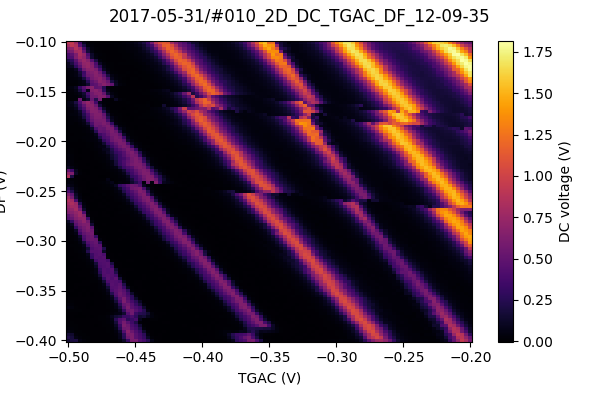

DataSet:
   data = load_data('2017-05-31/#010_2D_DC_TGAC_DF_12-09-35')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_set     | DF           | (101,)
   Setpoint | TGAC_set   | TGAC         | (101, 101)
   Measured | DC_voltage | DC_voltage   | (101, 101)
Started at 2017-05-31 12:09:36
Finished at 2017-05-31 12:52:28


In [49]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
# x_vals.parameter(x_vals[0])
# y_vals.parameter(y_vals[0])

In [13]:
x_vals = TGAC.sweep(-0.5, -0.2, step=0.003)
y_vals = DF.sweep(-0.4, -0.1,  step=0.003)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X101 x Y101


In [ ]:
layout.stop()

In [67]:
DC_parameter.setup()
loop = Loop(DS_vals).loop(
    y_vals).loop(
        x_vals).each(
            DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
# plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
# x_vals.parameter(x_vals[0])
# y_vals.parameter(y_vals[0])

DataSet:
   data = load_data('2017-05-31/#013_2D_DC_TGAC_DF_17-47-36')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DS_set     | DS           | (17,)
   Setpoint | DF_set     | DF           | (17, 101)
   Setpoint | TGAC_set   | TGAC         | (17, 101, 101)
   Measured | DC_voltage | DC_voltage   | (17, 101, 101)
Started at 2017-05-31 17:47:38


Exception in thread slack:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\labuser\documents\github\silq\silq\tools\general_tools.py", line 420, in __call__
    cls._instances[cls] = super(Singleton, cls).__call__(*args, **kwargs)
  File "c:\users\labuser\documents\github\silq\qcodes\qcodes\widgets\slack.py", line 119, in __init__
  File "c:\users\labuser\documents\github\silq\qcodes\qcodes\widgets\slack.py", line 124, in start
  File "c:\users\labuser\documents\github\silq\qcodes\qcodes\widgets\slack.py", line 231, in update
  File "c:\users\labuser\documents\github\silq\qcodes\qcodes\widgets\slack.py", line 264, in handle_messages
  File "c:\users\labuser\documents\github\silq\qcodes\qcodes\widgets\slack.py", line 332, in print_measurement_information
AttributeError: type

Finished at 2017-06-01 05:08:46
clearing focus
clearing focus
clearing focus


## Continuous single point scan

Continuously measure DC voltage for fixed gate voltages.
This can be used to check stability of device

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Variable read

This measurement performs a `plunge - read - empty` sequence while varying the read voltage.
For a donor, this should show a spin tail at sufficient magnetic field.

## Settings

In [4]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

## Scan

<IPython.core.display.Javascript object>


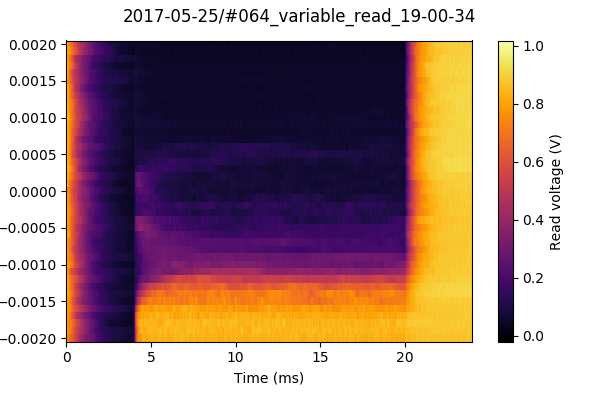

DataSet:
   data = load_data('2017-05-25/#064_variable_read_19-00-34')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (41,)
   Setpoint | time_set      | time         | (41, 12000)
   Measured | read_voltage  | read_voltage | (41, 12000)
Started at 2017-05-25 19:00:36
Finished at 2017-05-25 19:06:03


In [22]:
variable_read_parameter.samples=200
loop = Loop(read_voltage.sweep(0.002, -0.002, num=41)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run();

# Live DC scan

This measurement creates a 2D DC scan that updates continuously.
The plot can be combined with a SIM GUI to quickly tune up the device

## Settings

In [9]:
DC_sweep_parameter.pulse_duration = .1
DC_sweep_parameter.trace_pulse.duration = 20
DC_sweep_parameter.final_delay = 0

DC_sweep_parameter.trace_pulse.enabled = False
DC_sweep_parameter.trace_pulse.connection_label = 'TGAC'

DC_sweep_parameter.sweep_parameters.clear()
xrange = 0.04
yrange = 0.04
DC_sweep_parameter.add_sweep('TGAC', np.linspace(-xrange, xrange, 15), 
                             connection_label='TGAC',
                            offset_parameter=TGAC)
DC_sweep_parameter.add_sweep('DF', np.linspace(-yrange, yrange, 15), 
                             connection_label='DF',
                             offset_parameter=DF)

print(f'pulses: {len(DC_sweep_parameter.pulse_sequence)}')

pulses: 240


In [14]:
DC_sweep_parameter.temporary_settings(continuous=True)
%prun DC_sweep_parameter.setup()

## Scan

In [13]:
ramp_voltages(0)

<IPython.core.display.Javascript object>


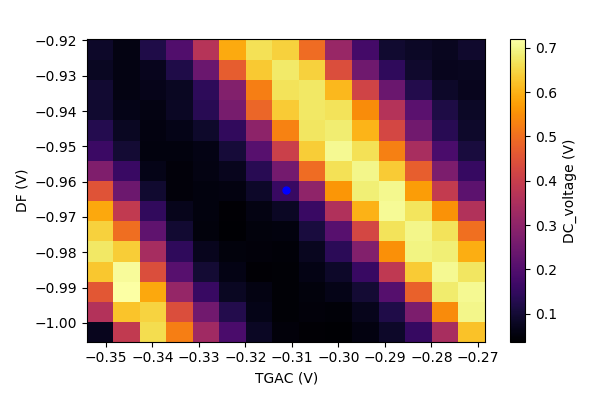

Wall time: 5.62 s


In [10]:
%time plot = DCSweepPlot(DC_sweep_parameter, auto_start=True)

In [9]:
retune_parameter()

(3, [-0.31125, -0.9625], nan)

## Analyse single trace

In [ ]:
from silq.analysis.analysis import *
traces = DC_sweep_parameter.data['trace']['output']
result = find_high_low(traces, threshold_method='6*std_low')
low, high = result['low'], result['high']
high.pop('traces')
low.pop('traces')
print(f'High: {high}')
print(f'Low: {low}')
SNR = result['voltage_difference'] / np.sqrt(high['std'] ** 2 + low['std'] ** 2)
print(f'SNR: {SNR}, threshold_voltage: {result["threshold_voltage"]}')

In [ ]:
traces = DC_sweep_parameter.data['trace']['output'][:5000]
traces_diff = np.diff(traces)

fig, axes = plt.subplots(2)
axes[0].plot(traces)
axes[1].plot(traces_diff)

# Calibration

These measurements perform an EPR calibration sequence.
This can be used to find the optimal tuning position with the best contrast.
In particular, the 2D scan scans a region and shows where the best contrast is.
Note that you can also run `retune_parameter`, which automatically performs 2D scans and tunes to the best position.

## Settings

In [6]:
EPR_parameter.t_skip = 0.0
EPR_parameter.t_read = 1.5
EPR_parameter.samples = 100

## Single scan

In [10]:
retune_parameter()

(2, [-0.36932499999999996, -0.25580000000000003], 0.37000000000000005)

In [28]:
EPR_parameter.single_settings(silent=False, samples=200, save_traces=True)
data = Measure(EPR_parameter).run(name='single_EPR')

contrast: 0.000
dark_counts: 0.000
voltage_difference: 0.000
fidelity_empty: 0.000
fidelity_load: 0.000
DataSet:
   data = load_data('2017-05-31/#001_single_EPR_09-31-00')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | single_set         | single             | (1,)
   Measured | contrast           | contrast           | (1,)
   Measured | dark_counts        | dark_counts        | (1,)
   Measured | voltage_difference | voltage_difference | (1,)
   Measured | fidelity_empty     | fidelity_empty     | (1,)
   Measured | fidelity_load      | fidelity_load      | (1,)
acquired at 2017-05-31 09:31:08


<IPython.core.display.Javascript object>


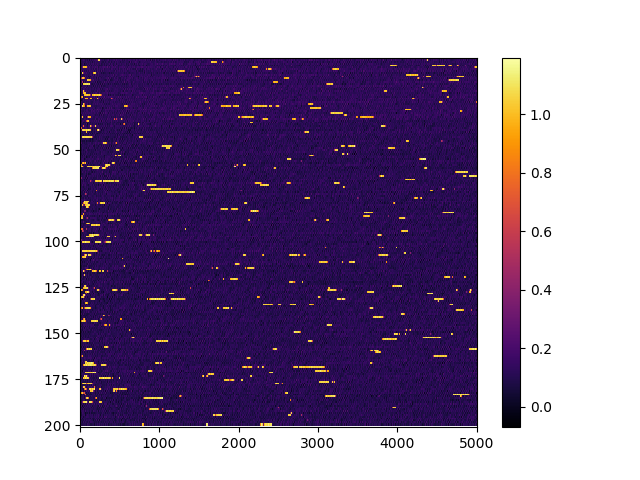

In [11]:
plot_traces(EPR_parameter.data['read_long']['output'])

## Continuous scan

In [10]:
# Scan with long and short contrast
EPR_plunge_duration = parameters.AttributeParameter(EPR_parameter.pulse_sequence['plunge'], 'duration')
vals = [5, 200]

EPR_parameter.temporary_settings(samples=500)
loop = Loop(dummy_parameter[0:30:1]).loop(
    EPR_plunge_duration[vals]).each(
        EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
# loop.plot(data.contrast)
loop.run()


DataSet:
   data = load_data('2017-06-01/#001_EPR_continuous_09-51-59')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (30,)
   Setpoint | duration_set       | duration           | (30, 2)
   Measured | contrast           | contrast           | (30, 2)
   Measured | dark_counts        | dark_counts        | (30, 2)
   Measured | voltage_difference | voltage_difference | (30, 2)
   Measured | fidelity_empty     | fidelity_empty     | (30, 2)
   Measured | fidelity_load      | fidelity_load      | (30, 2)
Started at 2017-06-01 09:52:00
Finished at 2017-06-01 09:52:12


RuntimeError: error 513: ApiFailed from function AlazarWaitAsyncBufferComplete with args: [2384, 224985088, 20000]

False


<IPython.core.display.Javascript object>


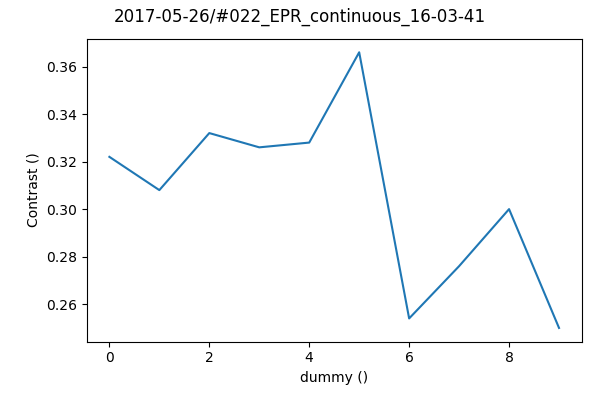

DataSet:
   data = load_data('2017-05-26/#022_EPR_continuous_16-03-41')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (10,)
   Measured | contrast           | contrast           | (10,)
   Measured | dark_counts        | dark_counts        | (10,)
   Measured | voltage_difference | voltage_difference | (10,)
   Measured | fidelity_empty     | fidelity_empty     | (10,)
   Measured | fidelity_load      | fidelity_load      | (10,)
Started at 2017-05-26 16:03:42
Finished at 2017-05-26 16:05:11
 

In [25]:
layout.stop()
EPR_parameter.clear_settings()
print(EPR_parameter.continuous)

loop = Loop(dummy_parameter[0:10:1]).each(EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
loop.plot(data.contrast)
%prun loop.run()


<IPython.core.display.Javascript object>


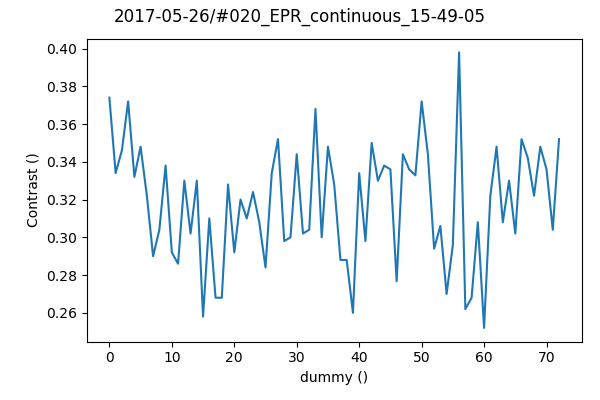

DataSet:
   data = load_data('2017-05-26/#020_EPR_continuous_15-49-05')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (100,)
   Measured | contrast           | contrast           | (100,)
   Measured | dark_counts        | dark_counts        | (100,)
   Measured | voltage_difference | voltage_difference | (100,)
   Measured | fidelity_empty     | fidelity_empty     | (100,)
   Measured | fidelity_load      | fidelity_load      | (100,)
Started at 2017-05-26 15:49:06
Finished at 2017-05-26 15:56:48


KeyboardInterrupt: 

In [23]:
EPR_parameter.temporary_settings(continuous=True, samples=500)
EPR_parameter.setup()

loop = Loop(dummy_parameter[0:100:1]).each(EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
loop.plot(data.contrast)
loop.run()

layout.stop()
EPR_parameter.clear_settings()

## 2D scan

In [18]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=7)

In [ ]:
EPR_parameter.samples=250
EPR_parameter.temporary_settings(continuous=True)
EPR_parameter.setup()
loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

data =  loop.get_data_set(name='EPR_calibration')

loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

In [20]:
%EPR

Succesfully started EPR pulse sequence
clearing focus
cycling
updating parameters
cycling
updating parameters
cycling
updating parameters
clearing focus


## read duration calibration

In [7]:
read_duration_parameter = parameters.AttributeParameter(EPR_parameter, 't_read')

In [ ]:
EPR_parameter.temporary_settings(samples=500, continuous=True)
EPR_parameter.setup()
loop = Loop(
    read_duration_parameter.sweep(0.1, 1.5, num=25)).each(
        EPR_parameter)
data =  loop.get_data_set(name='EPR_calibration_t_read')

plot = qc.MatPlot(figsize=(10, 3), subplots=(1, 3))
plot[0].add(data.contrast)
plot[1].add(data.dark_counts)
plot[2].add(data.voltage_difference)
plt.tight_layout()

loop.with_bg_task(plot.update).run()

layout.stop()
EPR_parameter.clear_settings()

# Adiabatic sweeping

In [7]:
adiabatic_ESR_parameter.t_skip = 0.0
adiabatic_ESR_parameter.t_read = 0.8

## Single scan

In [ ]:
old_pseq = adiabatic_ESR_parameter.pulse_sequence

In [ ]:
EPR_parameter.pulse_sequence

In [ ]:
adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=True
pulses = ['empty', 'plunge', 'read_long', 'final']
durations = [0.25, 1, 10, 0.25]

adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=False
pulses = ['plunge', 'read_long', 'final']
durations = [0.3, 10, 0.25]

t = 0
for duration, pulse in zip(durations, pulses):
    adiabatic_ESR_parameter.pulse_sequence[pulse].t_start = t
    adiabatic_ESR_parameter.pulse_sequence[pulse].duration = duration
    t += duration
    
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

In [ ]:
adiabatic_ESR_parameter.single_settings(samples=200, continuous=False, silent=False)
adiabatic_ESR_parameter()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'], ax=axes[0])
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'] > 0.24, ax=axes[1])

## Center frequency scan

In [18]:
adiabatic_freq_parameter = parameters.AttributeParameter(
    adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'], 'frequency')
adiabatic_freq_parameter(41e9)

In [19]:
vals = adiabatic_freq_parameter.sweep(39.075e9, 39.4e9, step=0.5e6)
# vals = keysight.frequency.sweep(39.05e9, 39.4e9, step=0.5e6)
print(f'Sweep vals: {len(vals)}')

Sweep vals: 651


In [20]:
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].frequency_deviation = 2e6
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].power = 0
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].t_start = 0.4
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].duration = 0.2

adiabatic_ESR_parameter.pulse_sequence['plunge'].duration = 2

adiabatic_ESR_parameter.pulse_sequence['final'].t_start = 12
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 12.25
	DCPulse(plunge, A=0.01, t_start=0, t_stop=2)
	FrequencyRampPulse(adiabatic_ESR, frequency=41000.00 MHz, frequency_deviation=2.00, power=0, t_start=0.4, t_stop=0.6)
	DCPulse(read_long, A=0, t_start=2, t_stop=12)
	DCPulse(final, A=0, t_start=12, t_stop=12.25)

<IPython.core.display.Javascript object>


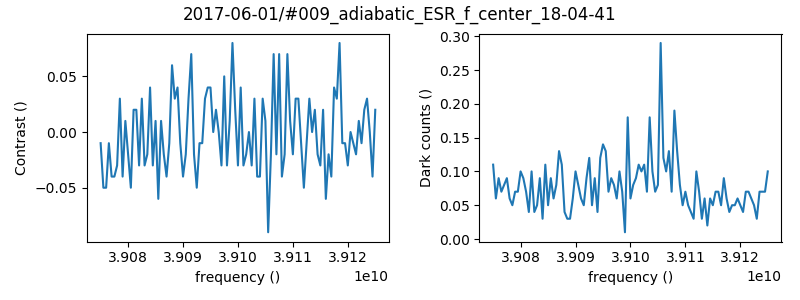

DataSet:
   data = load_data('2017-06-01/#009_adiabatic_ESR_f_center_18-04-41')
   <Type>   | <array_id>             | <array.name>           | <array.shape>
   Setpoint | frequency_set          | frequency              | (651,)
   Setpoint | index0_set             | index0                 | (651, 2)
   Measured | retune_parameter_msmts | retune_parameter_msmts | (651,)
   Measured | optimal_set_vals       | optimal_set_vals       | (651, 2)
   Measured | EPR_acquisition        | EPR_acquisition        | (651,)
   Measured | contrast               | contrast               | (651,)
   Measured | dark_counts            | dark_counts            | (651,)
   Measured | voltage_difference     | voltage_difference     | (651,)
Started at 2017-06-01 18:04:43
Finished at 2017-06-01 18:33:04


KeyboardInterrupt: 

In [21]:
adiabatic_ESR_parameter.samples = 100
EPR_parameter.samples = 250
# adiabatic_ESR_parameter.temporary_settings(continuous=True)
# adiabatic_ESR_parameter.setup(start=True)
loop = Loop(
    vals, delay=0.1).each(
        retune_parameter,
        adiabatic_ESR_parameter)
data = loop.get_data_set(name='adiabatic_ESR_f_center')
loop.plot(data.contrast, data.dark_counts, figsize=(8,3))

loop.run()

# layout.stop()
# adiabatic_ESR_parameter.clear_settings()

# T1

In [22]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(0.1, 3.5, num=12, base=10))[:-1]
# np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [1.2589254117941673, 2.5650209056800453, 5.2261493690870005, 10.648114862349344, 21.695198914988655, 44.203284998850606, 90.062802021127865, 183.50012466511902, 373.87572889654302, 761.76003102461243, 1552.0620891311994]


In [13]:
T1_duration_parameter = parameters.AttributeParameter(T1_parameter.pulse_sequence['plunge'], 'duration')

T1_parameter.t_skip = 0

T1_duration_parameter(20)

T1_parameter.readout_threshold_voltage=0.4

T1_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 22.25
	DCPulse(empty, A=-0.01, t_start=0, t_stop=1)
	DCPulse(plunge, A=0.01, t_start=1, t_stop=21)
	DCPulse(read, A=0, t_start=21, t_stop=22)
	DCPulse(final, A=0, t_start=22, t_stop=22.25)

<IPython.core.display.Javascript object>


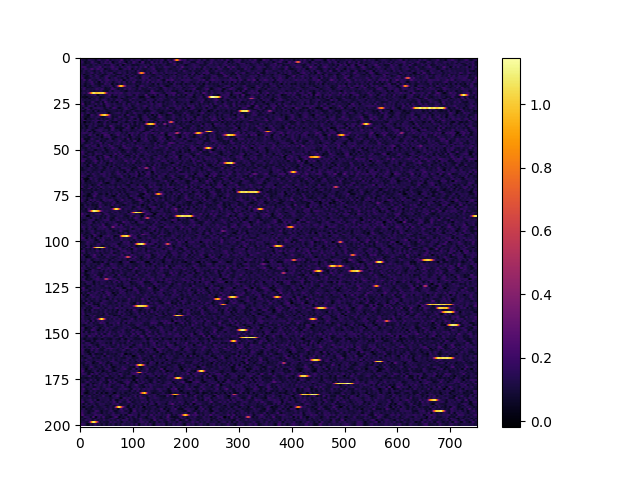

In [38]:
plot_traces(T1_parameter.data['read']['output'])

In [34]:
T1_duration_parameter(3000)
%time T1_parameter()

RuntimeError: error 579: ApiWaitTimeout: operation did not finish during timeout interval. Check your trigger. from function AlazarWaitAsyncBufferComplete with args: [2300, 214171648, 20000]

In [ ]:
T1_parameter.samples = 20
EPR_parameter.samples = 250
data = qc.Loop(
    dummy_parameter[0:80:1]).each(
        retune_parameter,
        qc.Loop(T1_duration_parameter[T1_wait_times]).each(
            T1_parameter)).run(name='T1_data', progress_interval=True)

# Optimal t_read

In [28]:
from silq.analysis.analysis import *
def optimal_t_read(traces, sample_rate, start_idx=0):
    dt = 1/sample_rate
    t_list = np.linspace(0, (traces.shape[1]-1)*dt, traces.shape[1])
    t_total = t_list[-1]
    
    t_read_percentages = np.arange(1, 30)
    contrast = np.zeros(len(t_read_percentages))
    t_read_arr = np.zeros(len(t_read_percentages))
    for k, t_read_perc in enumerate(t_read_percentages):
        t_read_arr[k] = t_read_perc / 100 * t_total
        read_pts = int(len(t_list) / 100 * t_read_perc)
        
        read_high_low = find_high_low(traces,
                                      threshold_method='config')
        threshold_voltage = read_high_low['threshold_voltage']
        voltage_difference = read_high_low['voltage_difference']

        read_segment1 = traces[:, :read_pts]
        read_segment2 = traces[:, -read_pts:]

        results1 = analyse_read(read_segment1, start_idx=start_idx,
                                threshold_voltage=threshold_voltage,
                                filter_loaded=True)
        up_proportion = results1['up_proportion']
        dark_counts = analyse_read(read_segment2, start_idx=start_idx,
                                   threshold_voltage=threshold_voltage,
                                   filter_loaded=False)['up_proportion']
        contrast[k] = up_proportion - dark_counts
    return t_read_arr*1e3, contrast

<IPython.core.display.Javascript object>


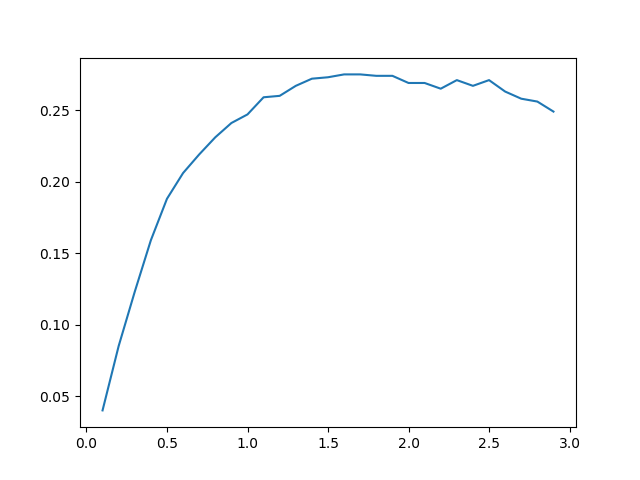

In [29]:
EPR_parameter.single_settings(samples=1000)
EPR_parameter()
t_read_arr, contrast = optimal_t_read(EPR_parameter.data['read_long']['output'], 500e3)

plt.figure()
plt.plot(t_read_arr, contrast)

# Batch measurements

In [ ]:
EPR_parameter.samples = 500
loop = Loop(dummy_parameter[0:5000:1]).each(
    retune_parameter)
loop.run(name='continuous_retune')

In [26]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=13)

big_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=5)

fine_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

In [27]:
EPR_parameter.samples=500
EPR_parameter.temporary_settings(continuous=False)
# EPR_parameter.setup()
loop = Loop(dummy_parameter[0:300:1]).each(
    Loop(dummy_parameter[0:10:1]).each(
        fine_loop,
        big_loop),
    Loop(dummy_parameter[0:10:1]).each(
        qc.Wait(180),
        fine_loop,
        big_loop),
    qc.Wait(3600))
data =  loop.get_data_set(name='EPR_batch')

# loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

DataSet:
   data = load_data('2017-05-29/#001_EPR_batch_09-25-14')
   <Type>   | <array_id>                   | <array.name>       | <array.shape>
   Setpoint | dummy_set                    | dummy              | (300,)
   Setpoint | dummy_set_0                  | dummy              | (300, 10)
   Setpoint | TGAC_set_0_0                 | TGAC               | (300, 10, 5)
   Setpoint | DF_set_0_0_0                 | DF                 | (300, 10, 5, 5)
   Measured | contrast_0_0_0_0_0           | contrast           | (300, 10, 5, 5)
   Measured | dark_counts_0_0_0_0_1        | dark_counts        | (300, 10, 5, 5)
   Measured | voltage_difference_0_0_0_0_2 | voltage_difference | (300, 10, 5, 5)
   Measured | fidelity_empty_0_0_0_0_3     | fidelity_empty     | (300, 10, 5, 5)
   Measured | fidelity_load_0_0_0_0_4      | fidelity_load      | (300, 10, 5, 5)
   Setpoint | TGAC_set_0_1                 | TGAC               | (300, 10, 13)
   Setpoint | DF_set_0_1_0                 | DF      

KeyboardInterrupt: 

# Testing

# Notes

To view a self-updating DC plot, go to `Live DC scan -> Scan` and run the first line.

To tune to a good transition, create a cell and type: `retune_parameter()`.
If the tuning is successful, the last value returned is not None.
If it is None, the tuning failed.
Note that you must already be roughly tuned to a transition.

